    Project
    Data Mining
    05/01/2017
    Enes Kemal Ergin

In [1]:
# Libraries used in the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inline plotting
%matplotlib inline

## Step 0. Introduction to Dataset

### Diabetes dataset

Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline.

File Names and format:
1. Date in MM-DD-YYYY format
2. Time in XX:YY format
3. Code
4. Value

The Code field is deciphered as follows:

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event

---

## Step 1. Data Information  and Descriptive Statistics


### Getting and Cleaning Data

In [2]:
# Importing data into pandas dataframe
data = pd.read_csv("./full_data/full_data.tsv", sep='\t', header=None)
data.columns = ["Date", "Time", "Code", "Value"]
data.tail()

,Date,Time,Code,Value
29325,05-09-1989,08:00,33,001
29326,05-09-1989,08:00,34,007
29327,05-10-1989,08:00,34,007
29328,05-11-1989,08:00,34,007
29329,05-12-1989,08:00,34,007


Problem Statement about the data:

- To be able to make the same convention(?) they make a decimally matched version for value column. However when I try to convert the column into integer it gives me error because ```int('007')``` is not valid in Python it should be ```int('7')```

>So I have to write a brute-force(ish) method to bypass the error and save the data.

In [3]:
# dropping NaN's
data = data.dropna()
data.index = range(len(data))

In [4]:
# Checking which ones are causing the trouble
#  and which ones are fine with conversion
# Small algorithm to bypass the '007' integer convertion error
converted_tmp = []
idx = []
import math
for i in range(len(data['Value'])):
    try:
        converted_tmp.append(int(data['Value'][i]))
        idx.append(i)
    except:
        temp_list= list(data['Value'][i])
        if temp_list[0] == 0 and temp_list[1] == 0:
            converted_tmp.append(int(data['Value'][i][2:]))
            idx.append(i)

        elif temp_list[0] == 0 and temp_list[1] != 0:
            converted_tmp.append(int(data['Value'][i][1:]))
            idx.append(i)

data = data.loc[idx] # Only Get what we got from our filtering
data['Value'] = converted_tmp # Replace the object typed column with integers

In [5]:
# More Cleaning the Data
# Combining Date and Time to make another column
data["Time_Series"] = data["Date"] + " " + data["Time"]
del data["Date"] # Remove Date Column to avoid abundance
del data["Time"] # Remove Time Column to avoid abundance

In [6]:
# Grouped by codes, so I will be more comfortable using clustering.
code_data = data.groupby('Code')
code_data.size()

Code
4        1
33    9455
34    3799
35    1053
36       1
48    1881
56     119
57     989
58    3518
59      20
60    2768
61      66
62    3158
63     219
64     904
65     331
66     154
67     326
68      34
69      68
70     139
71      98
72      94
dtype: int64

In [8]:
# Descriptive statistics of the Diabetic values of patiets in different days and times
desc = data['Value'].describe()
desc

count    29195.000000
mean        79.574482
std         93.553795
min          0.000000
25%          6.000000
50%         24.000000
75%        142.000000
max        501.000000
Name: Value, dtype: float64

In [9]:
desc['75%']- desc['25%'] # Interquartile range

136.0

In [10]:
desc['max'] - desc['min']

501.0

---

## Step 2. Split the Data 

I will split the data I have to Train and  Test/Validation data, and create random application data in our [max-min] scope.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

ImportError: No module named 'sklearn.model_selection'

---
## Step 4. Box Plots

In [15]:
data.head()

,Code,Value,Time_Series
0,58,100,04-21-1991 9:09
1,33,9,04-21-1991 9:09
2,34,13,04-21-1991 9:09
3,62,119,04-21-1991 17:08
4,33,7,04-21-1991 17:08


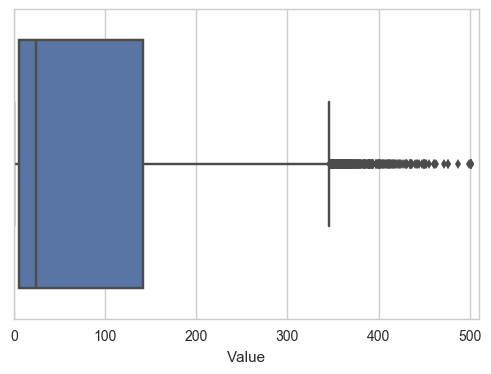

In [16]:
# Plotting the diabetes Values of ~29K entry in boxplot
sns.set_style("whitegrid")
plt.xlim(0,510)
ax = sns.boxplot(x=data["Value"])

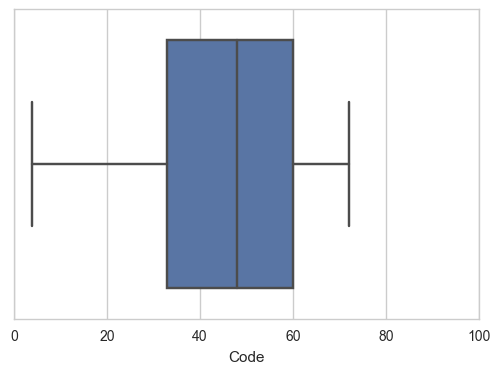

In [17]:
# Codes used to determine what kind of threatment needed for patient in specific value
sns.set_style("whitegrid")
plt.xlim(0,100)
ax = sns.boxplot(x=data["Code"])

---
## Step 5. Distribution of Columns

/Users/eneskemalergin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


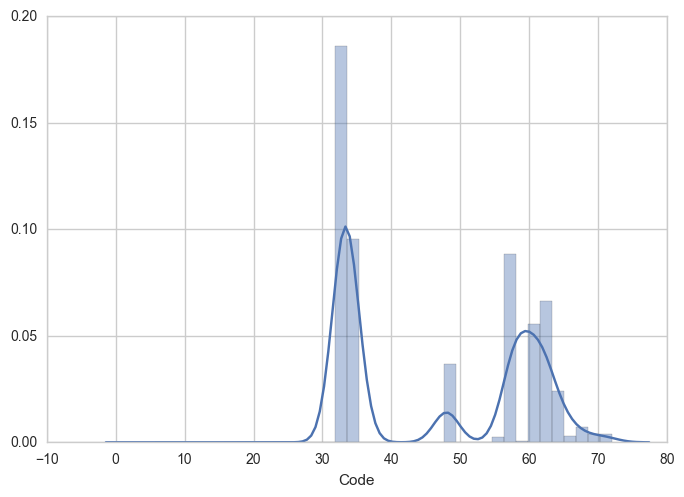

In [32]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.set()
sns.set_style("whitegrid")
sns.distplot(data["Code"])

/Users/eneskemalergin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


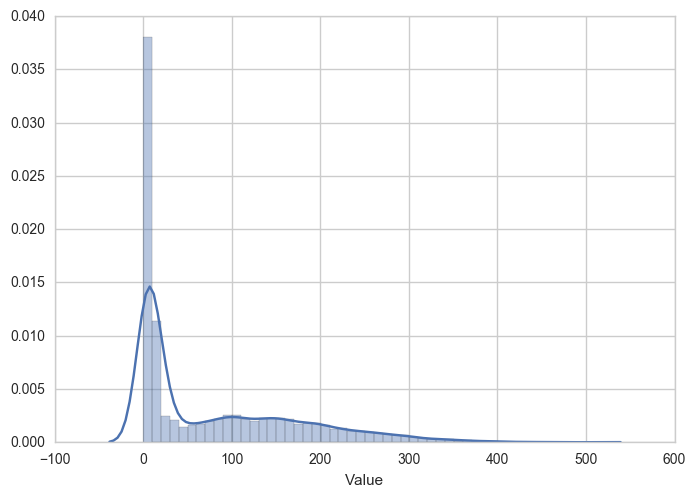

In [35]:
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.set()
sns.set_style("whitegrid")
sns.distplot(data["Value"])

---
## Step 6. Pairwise plot

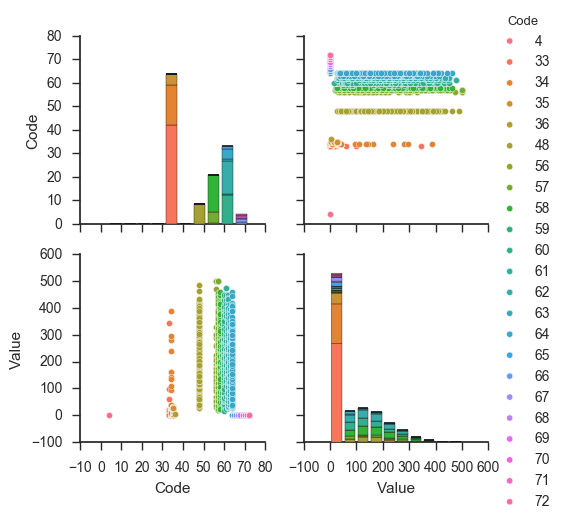

In [37]:
# Creating a Pairwise plot using Value and Code column
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Code")

---
## Step 7. Cross-Correlation of Input Columns

In [39]:
# Correlation
corrmat = data.corr()
corrmat

,Code,Value
Code,1.000000,0.649733
Value,0.649733,1.000000
